<a href="https://colab.research.google.com/github/lponcec94/PolyWorks/blob/main/semana_1/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción 

### Objetivo

El objetivo de este notebook es triple:

1. Explicar la utilización básica de librerías para ciencia de datos como Numpy y Pandas. 

2. Conocer y aplicar el análisis exploratorio de datos (EDA) necesario para plantear un modelo de machine learning. 

3. Aplicar un modelo de regresión lineal para aprender los pasos básicos en la implementación de modelos de machine learning. 

### Numeric Python (Numpy)

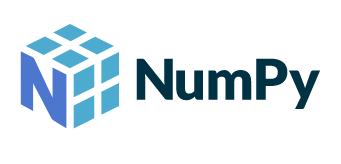

Numpy es un módulo fundamental para realizar manipulaciones con datos. Numpy utiliza la estructura básica de arreglos para realizar tareas de lectura, operaciones matemáticas y estadísticas, transformaciones, algebra lineal, simulaciones aleatorias, etc. 

In [1]:
# Para instalar numpy en un ambiente local. 
!pip install numpy # por default viene en google colab.

In [2]:
# Esto nos permite cargar módulos en Python
import numpy as np 

La estructura básica es ndarray, esto es un arreglo de *n* dimensiones.

In [3]:
vector = np.array([1, 2, 3, 4]) # Esto es un arreglo de 1 dimensión 
vector

array([1, 2, 3, 4])

In [4]:
matriz = np.array([[100, 400, 600, 700], 
          [500, 300, 200, 200]])
matriz

array([[100, 400, 600, 700],
       [500, 300, 200, 200]])

In [5]:
matriz.shape

(2, 4)

In [6]:
matriz.transpose()

array([[100, 500],
       [400, 300],
       [600, 200],
       [700, 200]])

In [7]:
matriz.flatten()

array([100, 400, 600, 700, 500, 300, 200, 200])

In [8]:
np.array([1, 54, 34, np.nan]) # nulo 

array([ 1., 54., 34., nan])

In [9]:
np.array([1, 54, 34, None]) 

array([1, 54, 34, None], dtype=object)

### Pandas

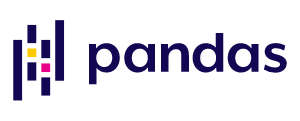

Pandas es un módulo de Python que nos permite trabajar con datos de forma tabular. Utiliza numpy por detrás. Es la herramienta básica de un analista de datos para leer, manipular, transformar, fitrar y exportar datos.

In [10]:
!pip install pandas

In [11]:
import pandas as pd

La estructura básica está dada por una Serie, que es un arreglo de numpy acompañado por un índice. 

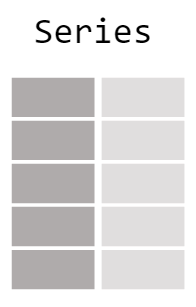

In [12]:
pd.Series(['Alfredo', 'Jacob', 'Edgar', 'Omar', 'Yvonne'])

0    Alfredo
1      Jacob
2      Edgar
3       Omar
4     Yvonne
dtype: object

In [13]:
nombres = ['Alfredo', 'Jacob', 'Edgar', 'Omar', 'Yvonne']
id_usuario = [1432, 4504, 2304, 3349, 9454]

In [14]:
df = pd.DataFrame(data=zip(nombres, id_usuario))
df.head()

0     1
0  Alfredo  1432
1    Jacob  4504
2    Edgar  2304
3     Omar  3349
4   Yvonne  9454

In [15]:
df = pd.DataFrame(data=zip(nombres, id_usuario), 
                columns=['nombre', 'gasto'])
df.head()

nombre  gasto
0  Alfredo   1432
1    Jacob   4504
2    Edgar   2304
3     Omar   3349
4   Yvonne   9454

In [16]:
df['nombre'][0]

'Alfredo'

In [17]:
df.loc[4, 'gasto'] # loc[indice, columnas]

9454

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  5 non-null      object
 1   gasto   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


# Exploratory Data Analysis (EDA)

## Lectura de datos

In [61]:
import numpy as np 
import pandas as pd

# librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# librerias para correr modelos
from scipy.stats import norm 
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

In [20]:
# Para leer datos desde una fuente externa utilizamos pandas. 

df = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_1/datasets/train.csv')

In [21]:
# Método que permite observar las primera filas del DF
df.head(10)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000
5   6          50       RL  ...        WD         Normal    143000
6   7          20       RL  ...        WD         Normal    307000
7   8          60       RL  ...        WD         Normal    200000
8   9          50       RM  ...        WD        Abnorml    129900
9  10         190       RL  ...        WD         Normal    118000

[10 rows x 81 columns]

In [22]:
# Método que resume los atributos de los datos en el DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Valores Nulos

**Es importante revisar si tenemos columnas con datos nulos**

In [23]:
nulos = df.isnull().sum()
nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [24]:
columnas_con_nulos = nulos[nulos.values > 0] 
columnas_con_nulos.sort_values(ascending=True)

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [25]:
columnas_con_nulos.shape

(19,)

En este caso tenomos 19 columnas con datos nulos. Por supuesto no en la misma proporción. Las preguntas que debemos hacernos son: **¿Por qué tenemos valores nulos?, ¿Qué debemos hacer con los valores nulos?**

Para responder estas preguntas es necesario entender los datos con los que estamos trabajando.

Para continuar la exploración requerimos separar las columnas con información numérica y categórica.

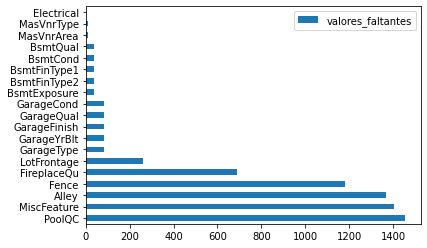

In [26]:
df.isnull().sum().to_frame(name='valores_faltantes')\
.query('valores_faltantes > 0').sort_values(by='valores_faltantes', ascending=False)\
.plot.barh();

In [27]:
df.shape

(1460, 81)

In [28]:
(columnas_con_nulos.sort_values(ascending=True) / df.shape[0]) * 100

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Por lo general, se eliminan las columnas que tiene 15% o más de datos nulos. 
En este caso por las características de las columnas podemos eliminar la mayoría de las columnas y en el caso de las columnas con pocos registros nulos podemos eliminarlos. 

In [29]:
df = df.drop(columnas_con_nulos[columnas_con_nulos > 36].index, axis=1)

In [30]:
df = df.drop(columns=columnas_con_nulos[columnas_con_nulos < 36].index, axis=0)

In [31]:
# Verificamos si tenemos valores nulos
df.isnull().sum().max()

0

In [32]:
# Revisamos la cantidad de columnas que nos quedan.
df.columns.shape

(62,)

In [33]:
# utilizamos el método para obtener variables numéricas y obtenemos los nombres
columnas_numericas = df._get_numeric_data().columns.tolist() # las convertimos a una lista para manipular los nombres
print(columnas_numericas)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [34]:
df_num = df[columnas_numericas].copy() # df[['Id', 'MSSubClass', ...]]
df_num

Id  MSSubClass  LotArea  ...  MoSold  YrSold  SalePrice
0        1          60     8450  ...       2    2008     208500
1        2          20     9600  ...       5    2007     181500
2        3          60    11250  ...       9    2008     223500
3        4          70     9550  ...       2    2006     140000
4        5          60    14260  ...      12    2008     250000
...    ...         ...      ...  ...     ...     ...        ...
1455  1456          60     7917  ...       8    2007     175000
1456  1457          20    13175  ...       2    2010     210000
1457  1458          70     9042  ...       5    2010     266500
1458  1459          20     9717  ...       4    2010     142125
1459  1460          20     9937  ...       6    2008     147500

[1460 rows x 35 columns]

Ahora obtenemos las columnas categóricas. 

In [35]:
columnas_categoricas = df.drop(columns=columnas_numericas).columns.tolist()
print(columnas_categoricas)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [36]:
df_categ = df[columnas_categoricas].copy()
df_categ

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0          RL   Pave      Reg  ...          Y       WD        Normal
1          RL   Pave      Reg  ...          Y       WD        Normal
2          RL   Pave      IR1  ...          Y       WD        Normal
3          RL   Pave      IR1  ...          Y       WD       Abnorml
4          RL   Pave      IR1  ...          Y       WD        Normal
...       ...    ...      ...  ...        ...      ...           ...
1455       RL   Pave      Reg  ...          Y       WD        Normal
1456       RL   Pave      Reg  ...          Y       WD        Normal
1457       RL   Pave      Reg  ...          Y       WD        Normal
1458       RL   Pave      Reg  ...          Y       WD        Normal
1459       RL   Pave      Reg  ...          Y       WD        Normal

[1460 rows x 27 columns]

Ahora que tenemos separada respectivamente nuestras columnas númericas y categóricas, el siguiente paso es revisar sobre qué trata mi variable o columna. Por ejemplo, en el caso de las columnas numéricas hay variables que son fechas, es importante transformarlas al tipo de dato propio de fecha y darle un tratamiento. 

**Recordemos que los modelos de machine learning sólo reciben datos númericos, por lo que es necesario hacer un preprocesamiento.**

In [37]:
# Eliminemos la columna de ID que no es funcional para la exploración ni el modelo. 

df_num.drop(columns=['Id'], inplace=True)

In [38]:
# Ahora obtengamos las columnas que sean una fecha o año 

columnas_fecha = [column for column in df_num.columns if 'Yr' in column or 'Year' in column]
columnas_fecha

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [39]:
# Quitamos las columnas de fecha del DF con columnas numéricas
# df_num.drop(columns=columnas_fecha, inplace=True) 

In [40]:
# Obtenemos las columnas con fechas
df_fechas = df[columnas_fecha].copy()
df_fechas.head()

YearBuilt  YearRemodAdd  YrSold
0       2003          2003    2008
1       1976          1976    2007
2       2001          2002    2008
3       1915          1970    2006
4       2000          2000    2008

In [41]:
df_fechas.dtypes # El tipo de dato no es de fecha

YearBuilt       int64
YearRemodAdd    int64
YrSold          int64
dtype: object

Es necesario modificar el tipo de dato para manipularlo

In [42]:
df_fechas = df_fechas.astype('datetime64[ns]')

In [43]:
df_fechas.dtypes

YearBuilt       datetime64[ns]
YearRemodAdd    datetime64[ns]
YrSold          datetime64[ns]
dtype: object

Revisemos el coeficiente de correlación entre las variables númericas.

In [44]:
correlaciones = df_num.corr()
correlaciones

MSSubClass   LotArea  OverallQual  ...    MoSold    YrSold  SalePrice
MSSubClass       1.000000 -0.139781     0.032628  ... -0.013585 -0.021407  -0.084284
LotArea         -0.139781  1.000000     0.105806  ...  0.001205 -0.014261   0.263843
OverallQual      0.032628  0.105806     1.000000  ...  0.070815 -0.027347   0.790982
OverallCond     -0.059316 -0.005636    -0.091932  ... -0.003511  0.043950  -0.077856
YearBuilt        0.027850  0.014228     0.572323  ...  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581  0.013788     0.550684  ...  0.021490  0.035743   0.507101
BsmtFinSF1      -0.069836  0.214103     0.239666  ... -0.015727  0.014359   0.386420
BsmtFinSF2      -0.065649  0.111170    -0.059119  ... -0.015211  0.031706  -0.011378
BsmtUnfSF       -0.140759 -0.002618     0.308159  ...  0.034888 -0.041258   0.214479
TotalBsmtSF     -0.238518  0.260833     0.537808  ...  0.013196 -0.014969   0.613581
1stFlrSF        -0.251758  0.299475     0.476224  ...  0.031372 -0.013604   0.605852
2ndFlrSF         0.307886  0.050986     0.295493  ...  0.035164 -0.028700   0.319334
LowQualFinSF     0.046474  0.004779    -0.030429  ... -0.022174 -0.028921  -0.025606
GrLivArea        0.074853  0.263116     0.593007  ...  0.050240 -0.036526   0.708624
BsmtFullBath     0.003491  0.158155     0.111098  ... -0.025361  0.067049   0.227122
BsmtHalfBath    -0.002333  0.048046    -0.040150  ...  0.032873 -0.046524  -0.016844
FullBath         0.131608  0.126031     0.550600  ...  0.055872 -0.019669   0.560664
HalfBath         0.177354  0.014259     0.273458  ... -0.009050 -0.010269   0.284108
BedroomAbvGr    -0.023438  0.119690     0.101676  ...  0.046544 -0.036014   0.168213
KitchenAbvGr     0.281721 -0.017784    -0.183882  ...  0.026589  0.031687  -0.135907
TotRmsAbvGrd     0.040380  0.190015     0.427452  ...  0.036907 -0.034516   0.533723
Fireplaces      -0.045569  0.271364     0.396765  ...  0.046357 -0.024096   0.466929
GarageCars      -0.040110  0.154871     0.600671  ...  0.040522 -0.039117   0.640409
GarageArea      -0.098672  0.180403     0.562022  ...  0.027974 -0.027378   0.623431
WoodDeckSF      -0.012579  0.171698     0.238923  ...  0.021011  0.022270   0.324413
OpenPorchSF     -0.006100  0.084774     0.308819  ...  0.071255 -0.057619   0.315856
EnclosedPorch   -0.012037 -0.018340    -0.113937  ... -0.028887 -0.009916  -0.128578
3SsnPorch       -0.043825  0.020423     0.030371  ...  0.029474  0.018645   0.044584
ScreenPorch     -0.026030  0.043160     0.064886  ...  0.023217  0.010694   0.111447
PoolArea         0.008283  0.077672     0.065166  ... -0.033737 -0.059689   0.092404
MiscVal         -0.007683  0.038068    -0.031406  ... -0.006495  0.004906  -0.021190
MoSold          -0.013585  0.001205     0.070815  ...  1.000000 -0.145721   0.046432
YrSold          -0.021407 -0.014261    -0.027347  ... -0.145721  1.000000  -0.028923
SalePrice       -0.084284  0.263843     0.790982  ...  0.046432 -0.028923   1.000000

[34 rows x 34 columns]

Text(0.5, 0.98, 'Mapa de Correlación')

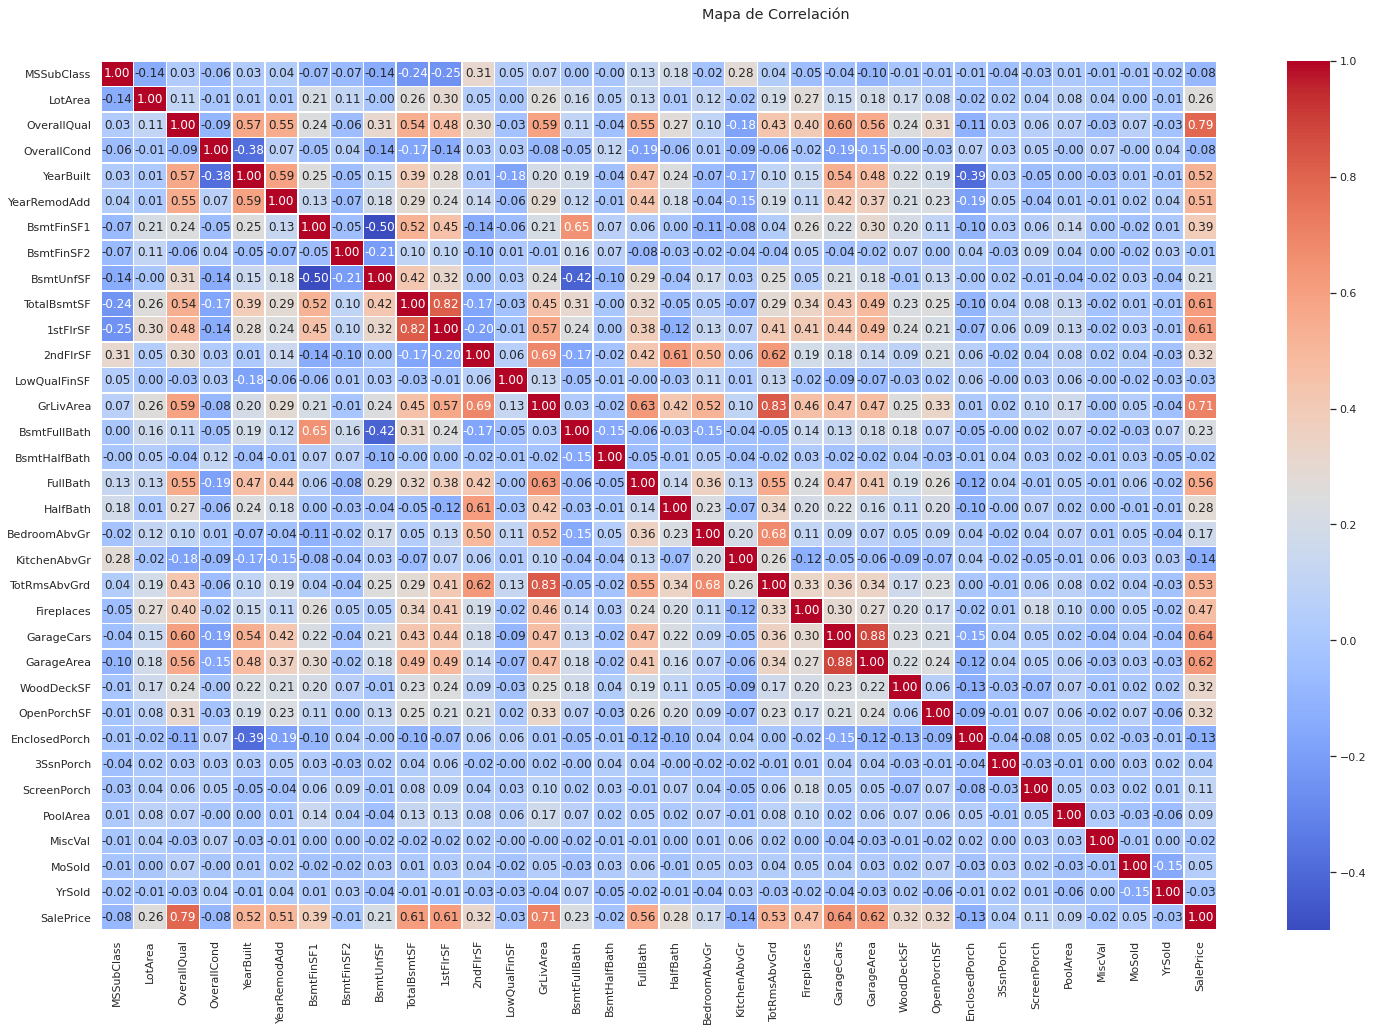

In [45]:
sns.set()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(round(correlaciones, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f',
            linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlación')

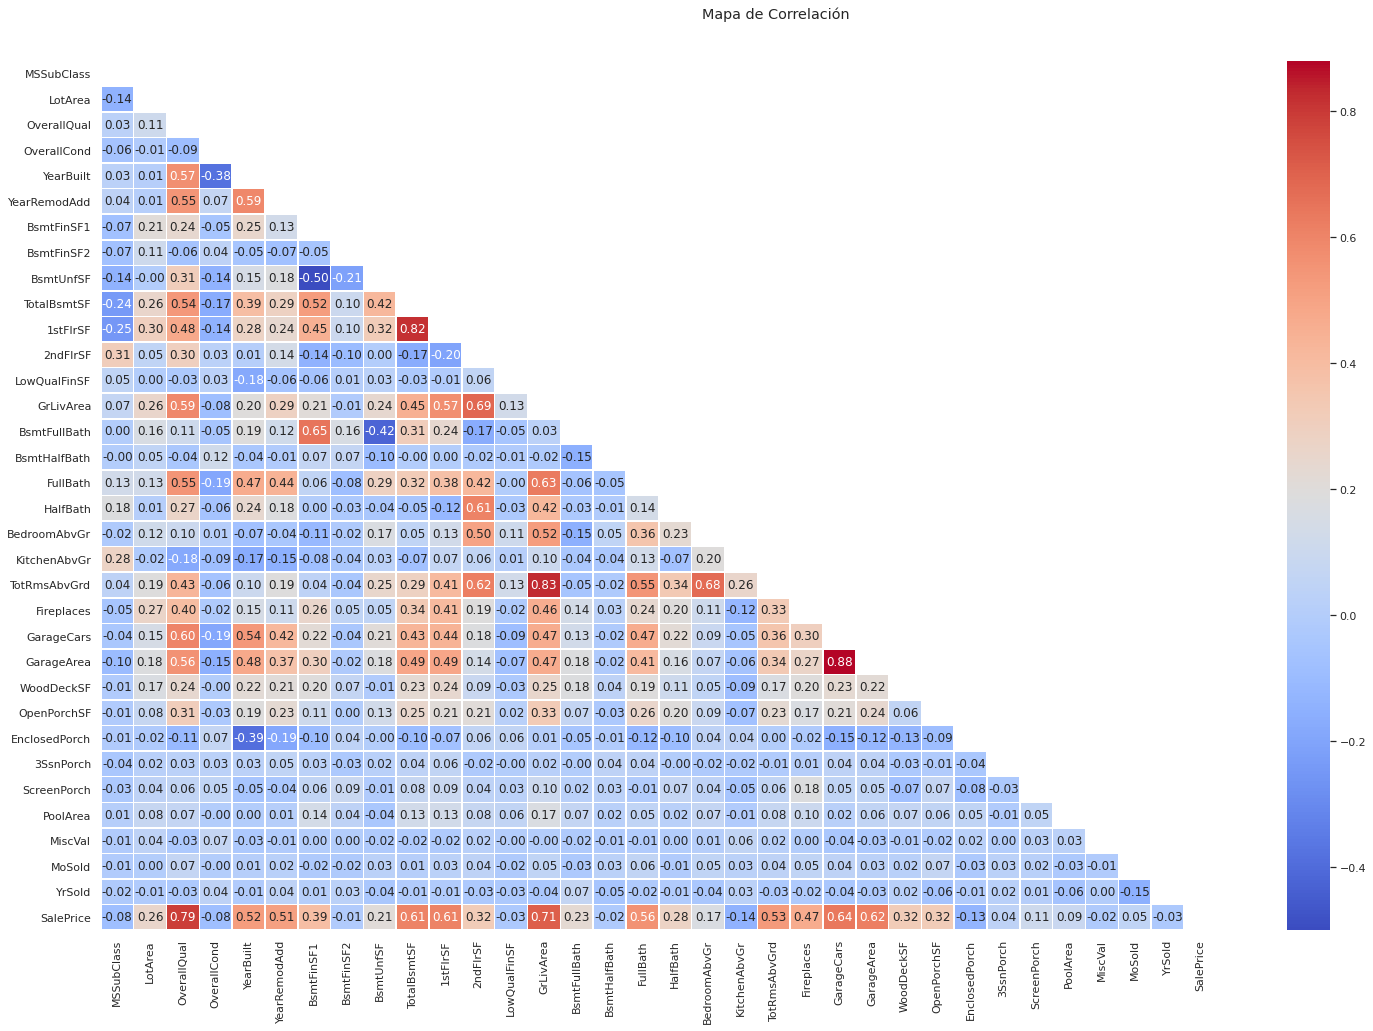

In [46]:
mask = np.zeros_like(correlaciones)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(25, 15))
  sns.heatmap(round(correlaciones, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f',
              linewidths=0.5, mask=mask)
  fig.subplots_adjust(top=0.93)
  fig.suptitle('Mapa de Correlación')

In [47]:
def mapa_de_calor(corr):
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = True
  with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f',
                linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlación')

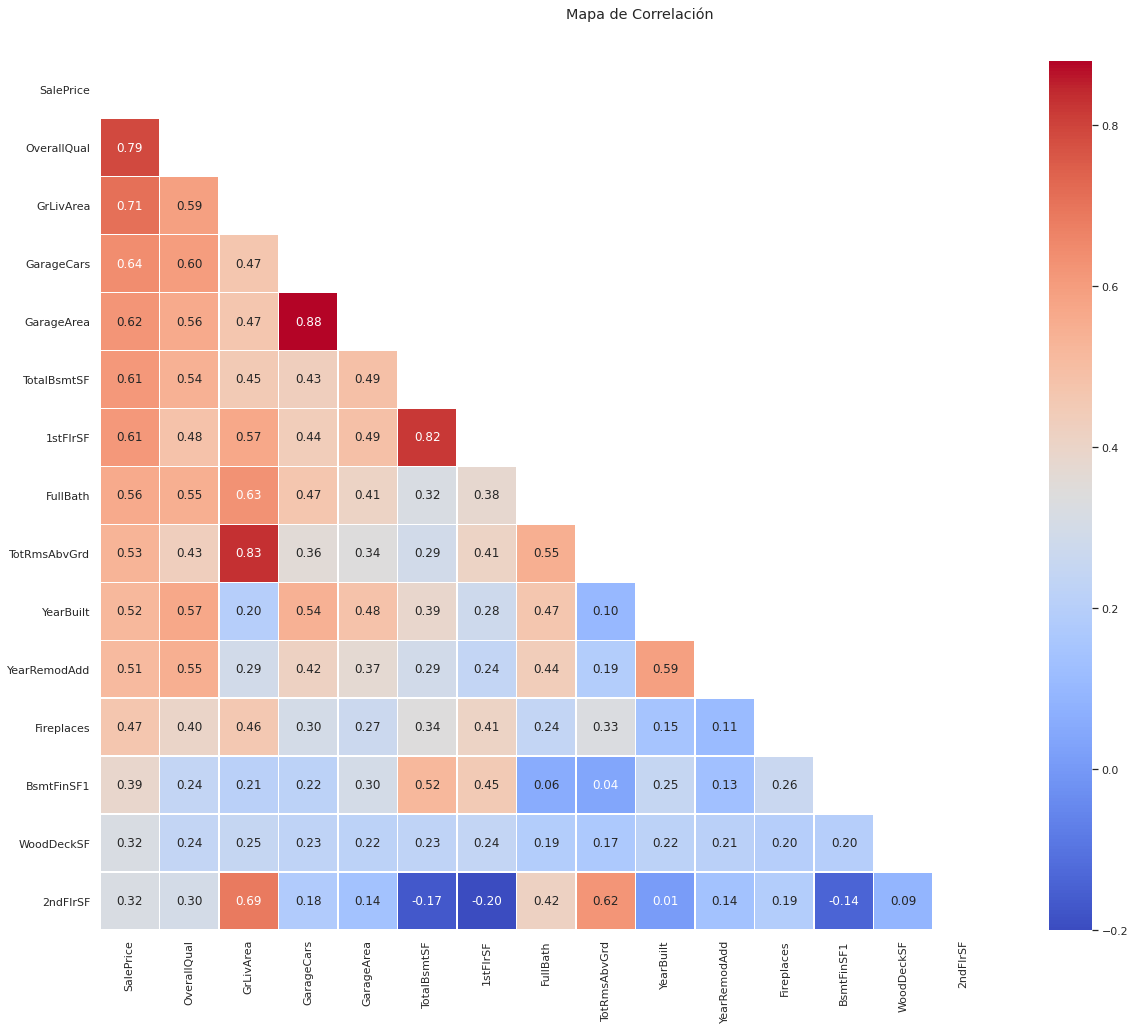

In [48]:
n_columnas = 15
columnas = correlaciones.nlargest(n_columnas, 'SalePrice')['SalePrice'].index
correlaciones = df_num[columnas].corr()
mapa_de_calor(correlaciones)

Vamos a utiliza estás características para plotear la relación con la variable que nos interesará predecir en nuestro modelo de regresión. En este caso es la variable de *SalePrice*. 

In [49]:
columnas

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF'],
      dtype='object')

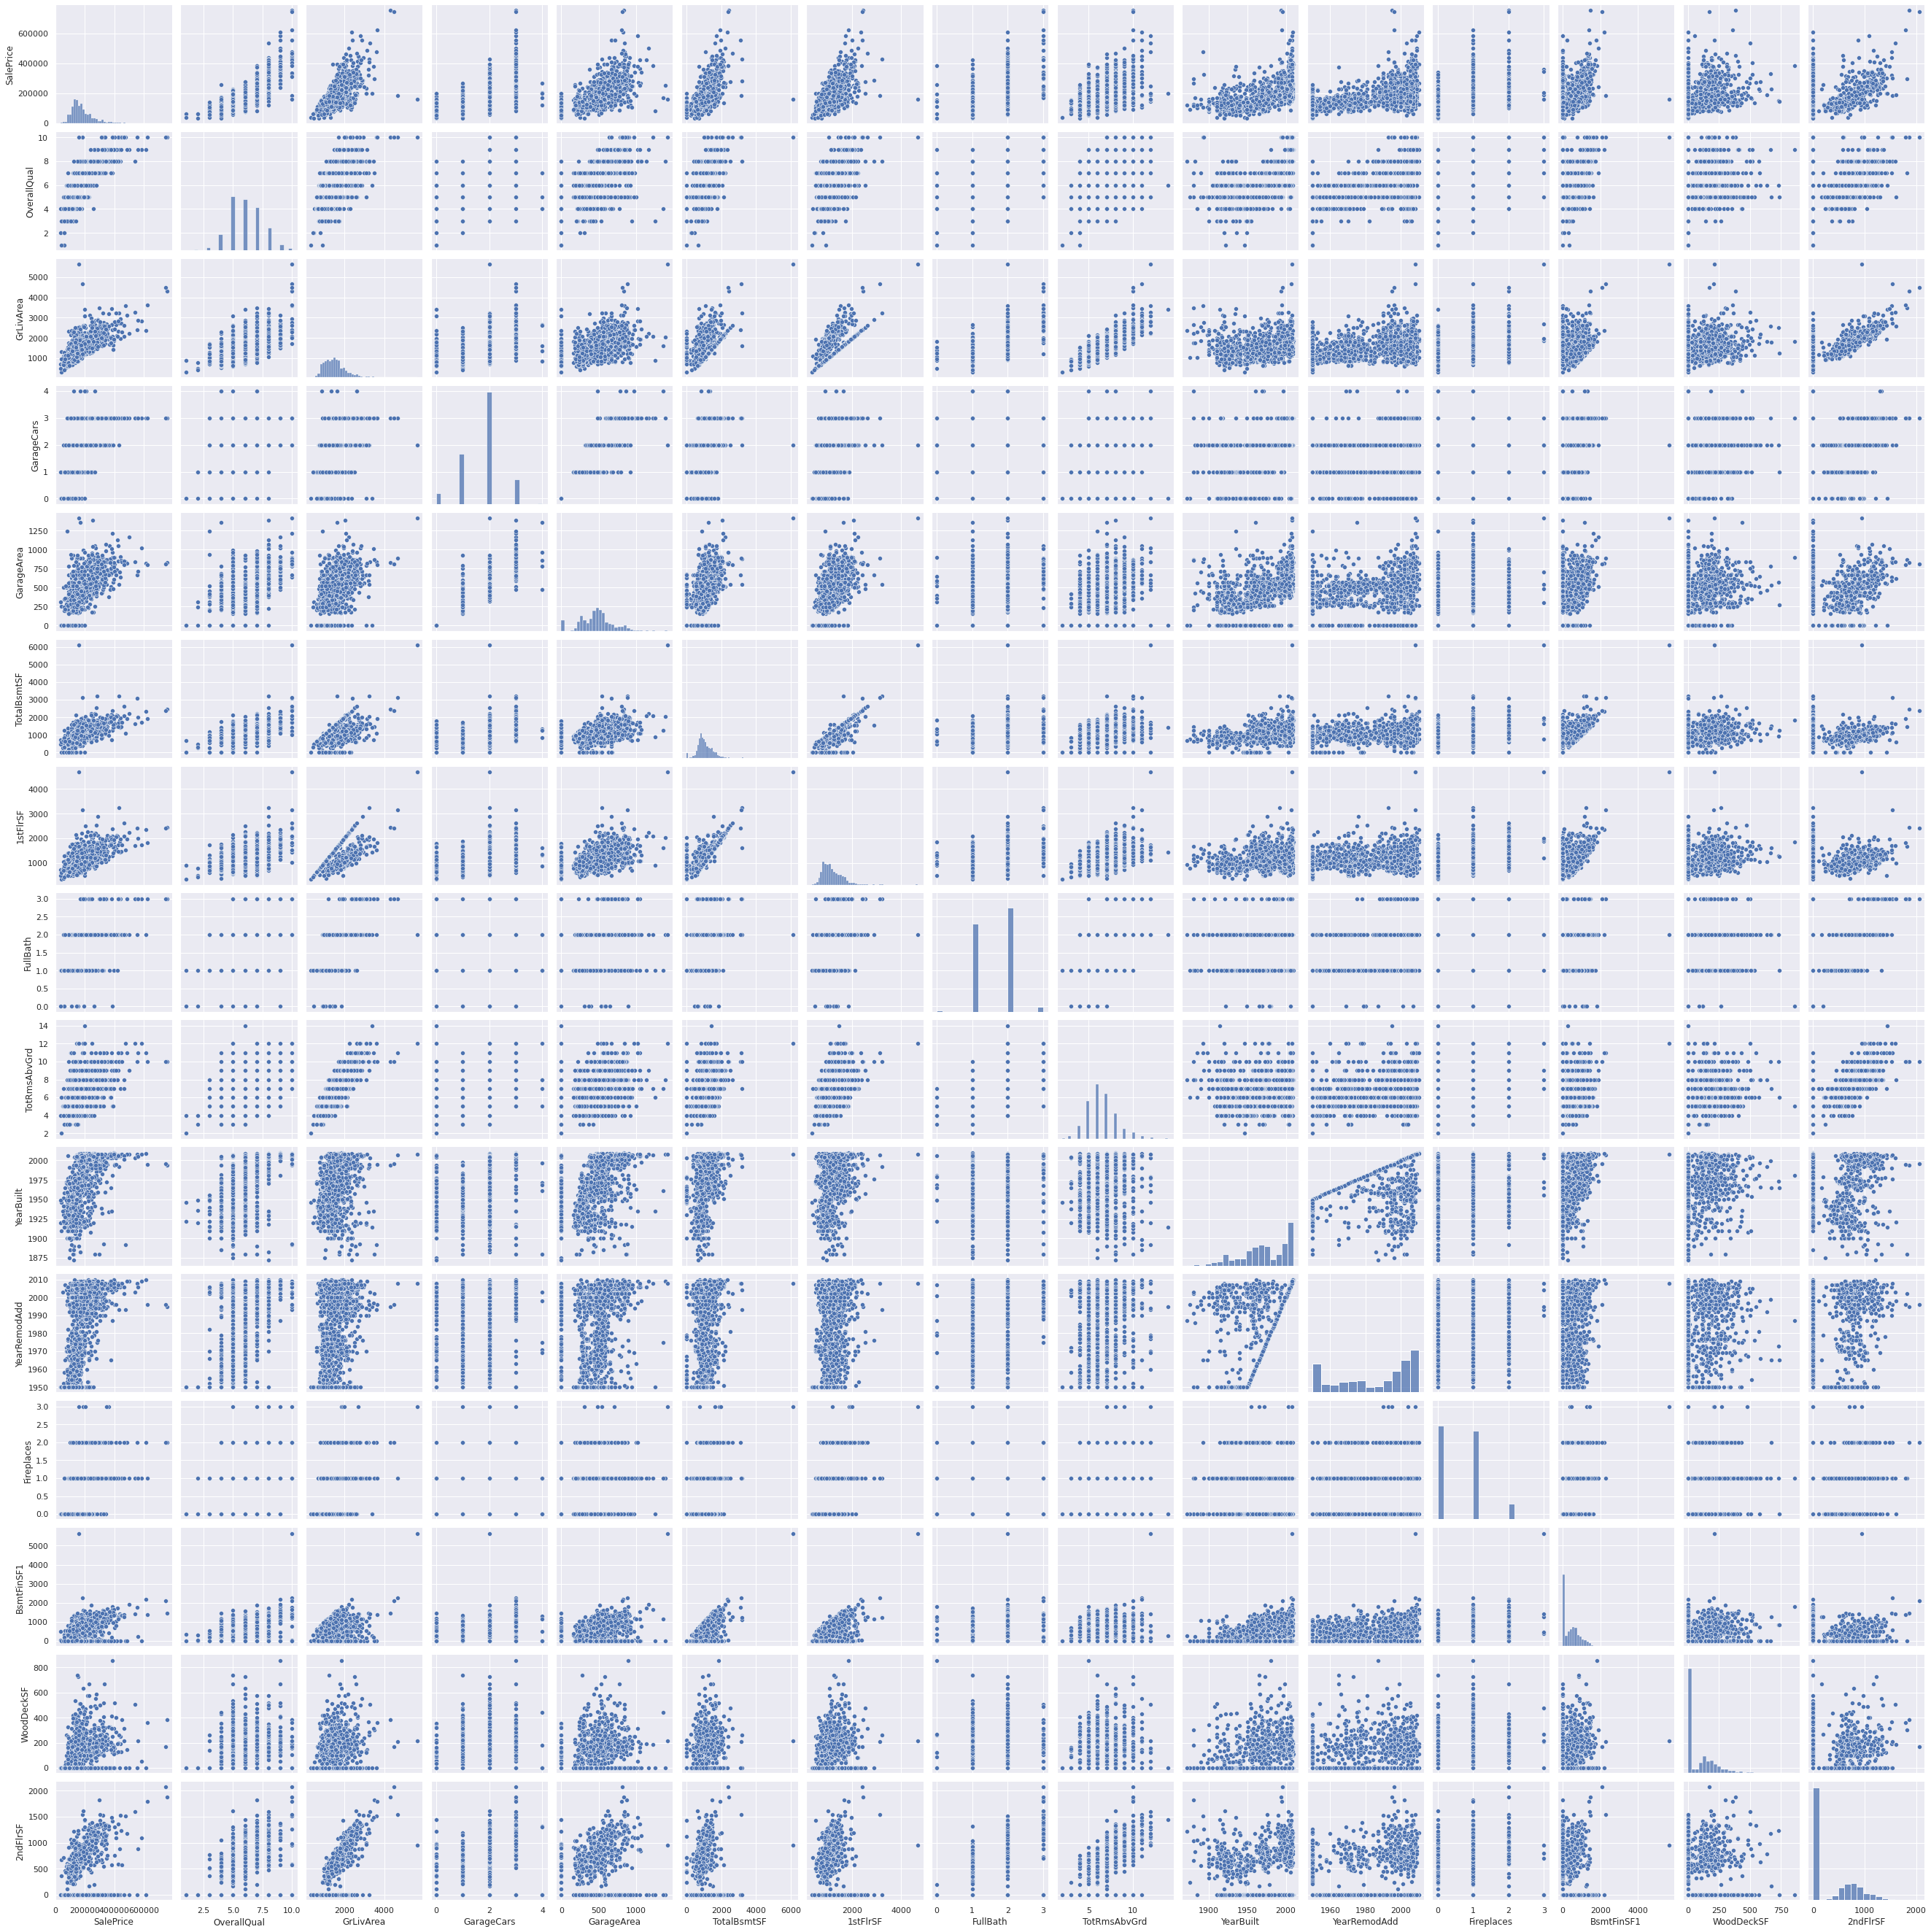

In [ ]:
sns.pairplot(df_num[columnas])

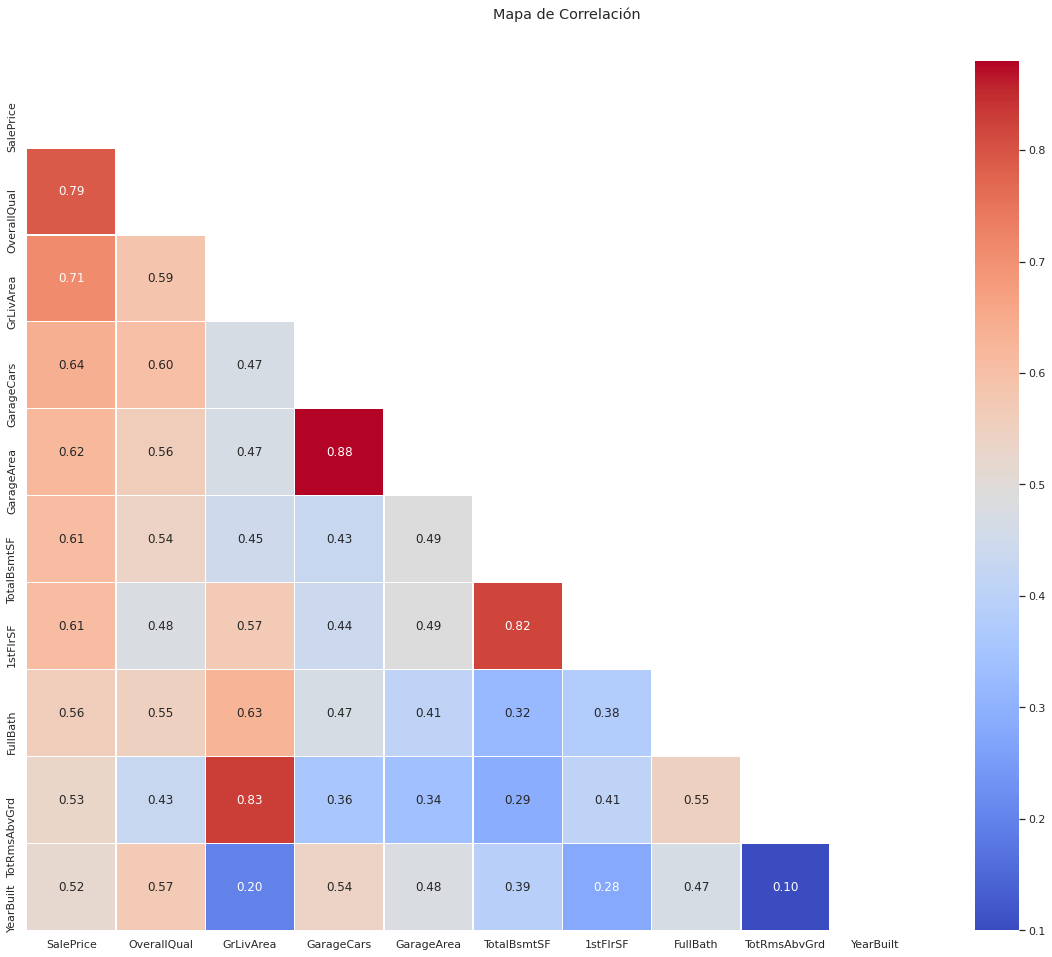

In [51]:
n_columnas = 10
columnas_top_10 = correlaciones.nlargest(n_columnas, 'SalePrice')['SalePrice'].index
correlaciones = df_num[columnas].corr()
mapa_de_calor(correlaciones)

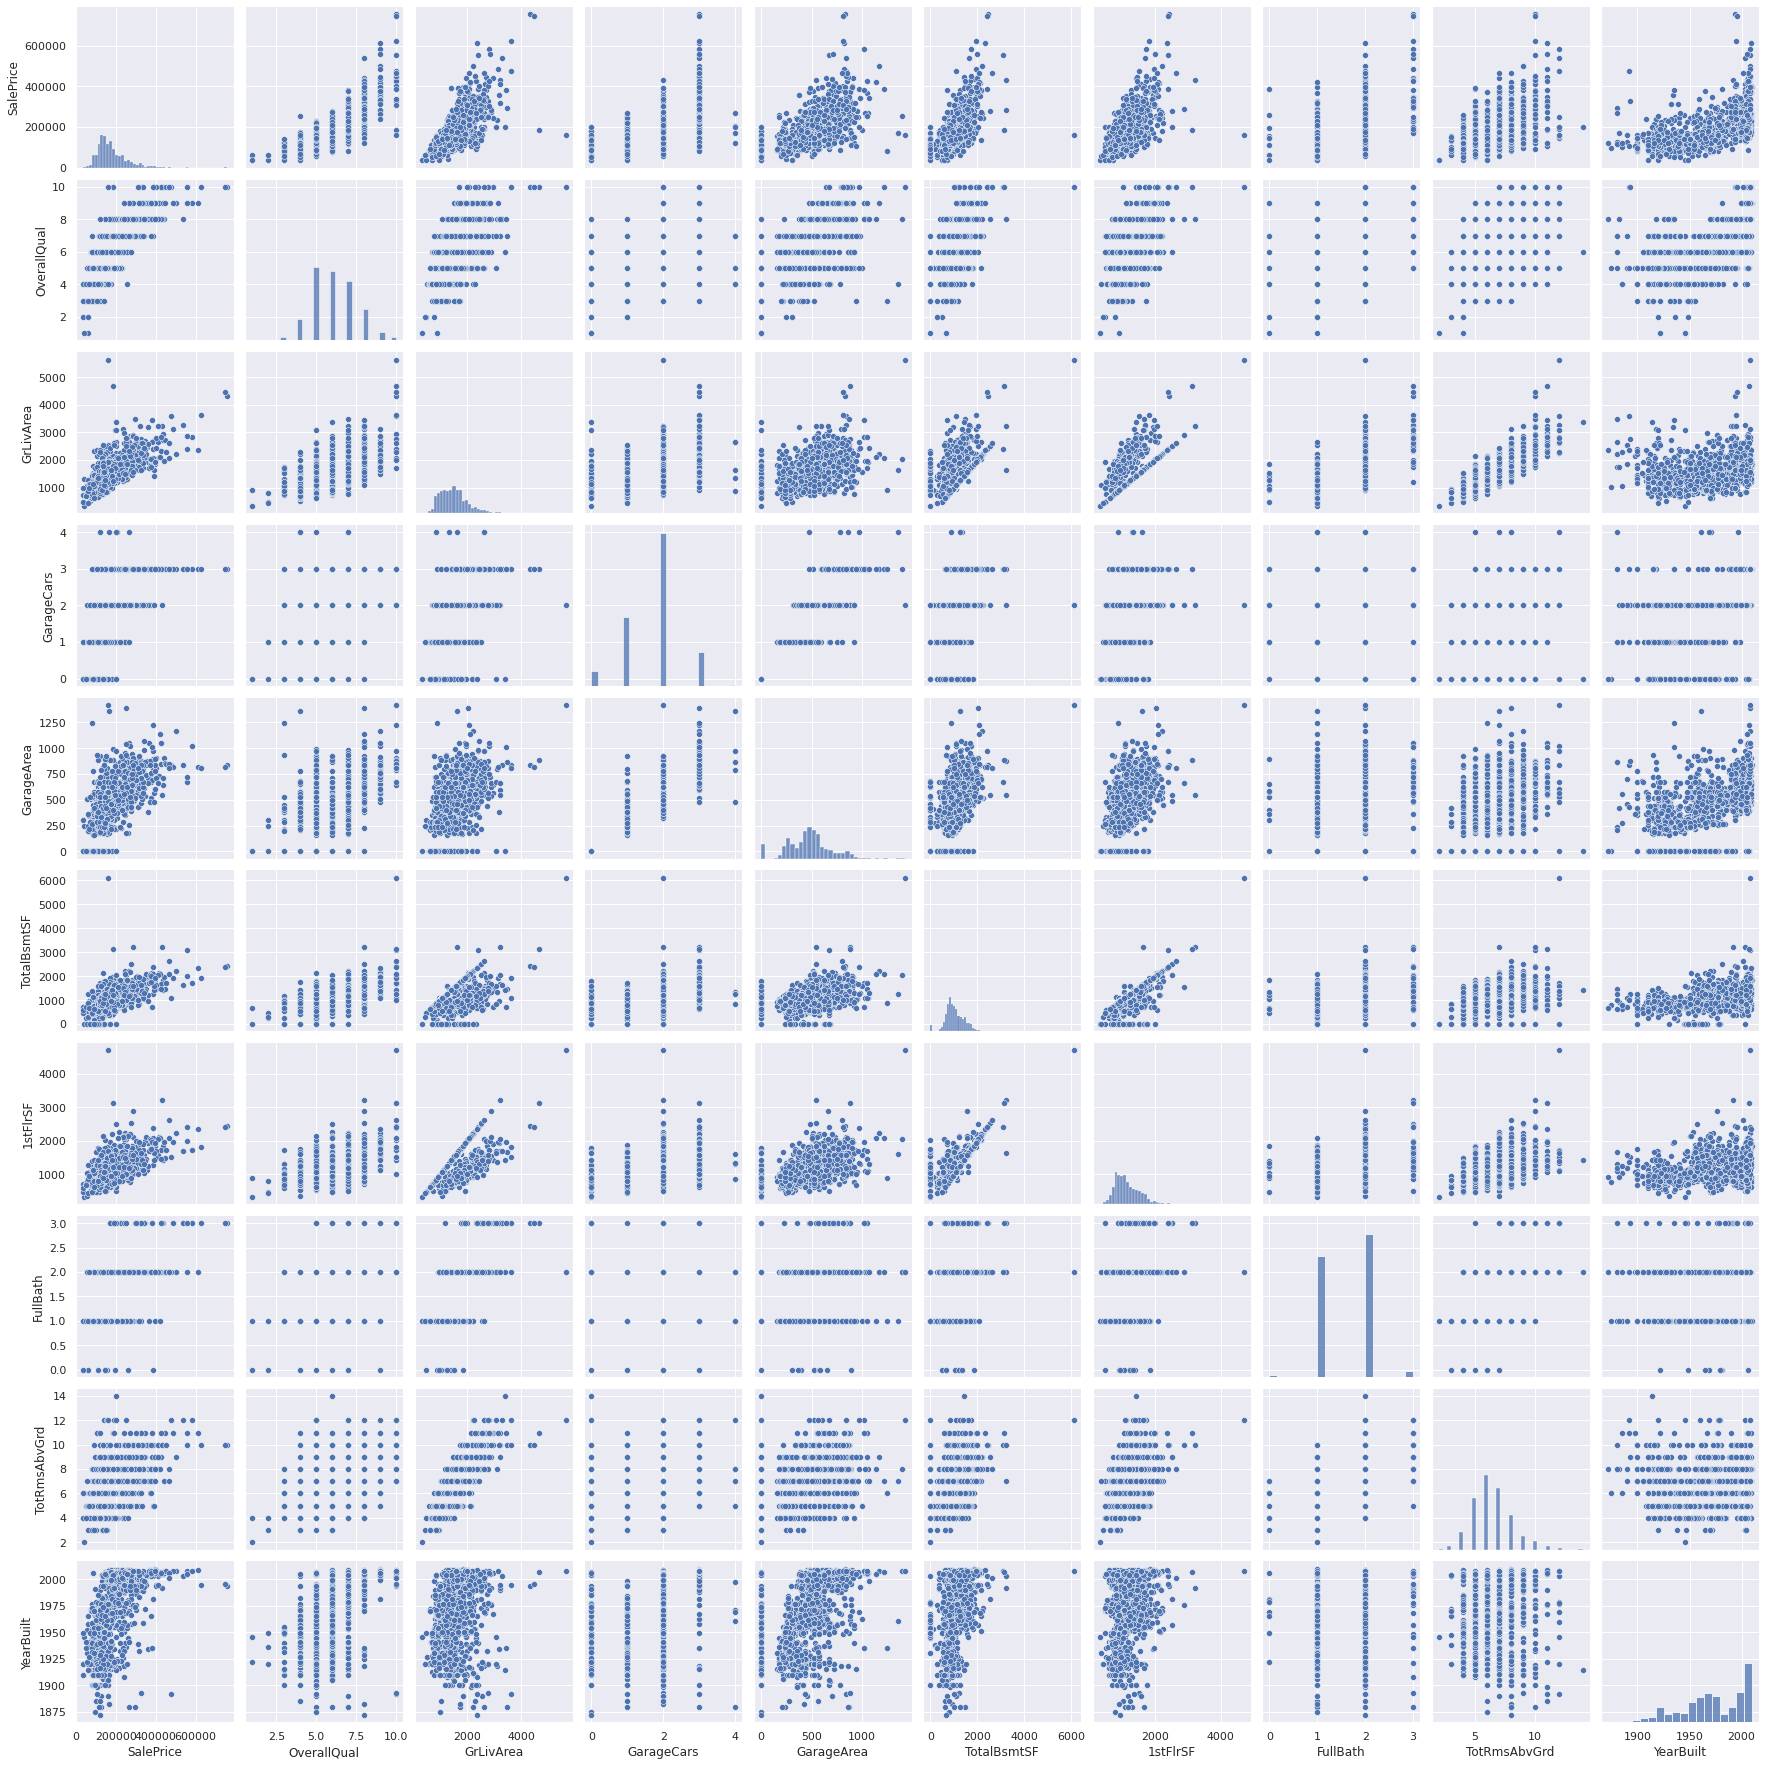

In [ ]:
sns.pairplot(df_num[columnas])

In [52]:
df_num.head()

MSSubClass  LotArea  OverallQual  ...  MoSold  YrSold  SalePrice
0          60     8450            7  ...       2    2008     208500
1          20     9600            6  ...       5    2007     181500
2          60    11250            7  ...       9    2008     223500
3          70     9550            7  ...       2    2006     140000
4          60    14260            8  ...      12    2008     250000

[5 rows x 34 columns]

In [53]:
columnas_top_10

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

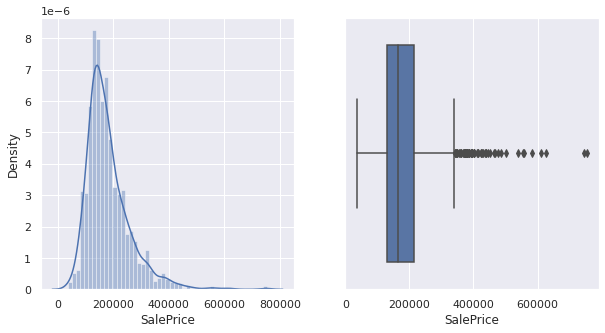

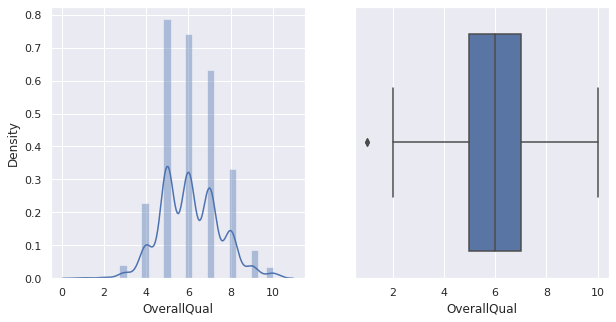

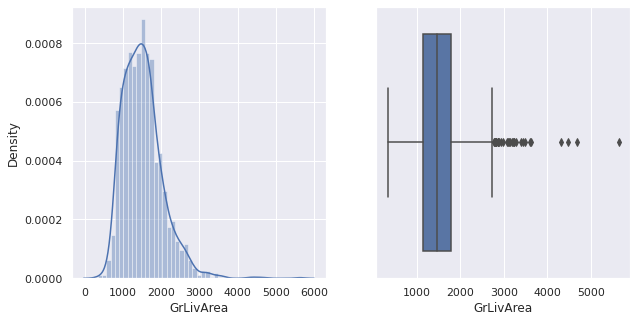

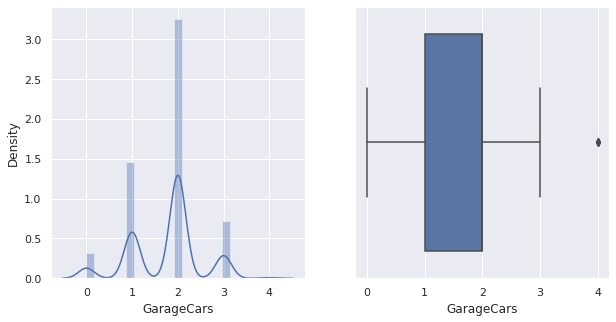

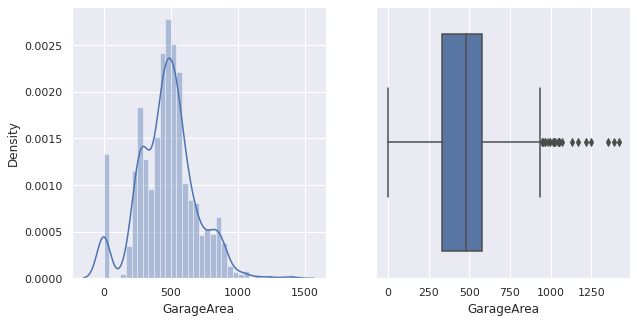

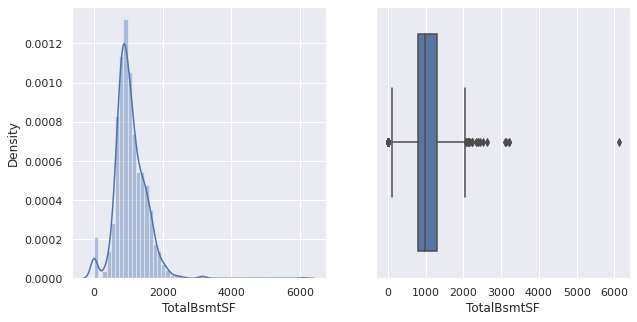

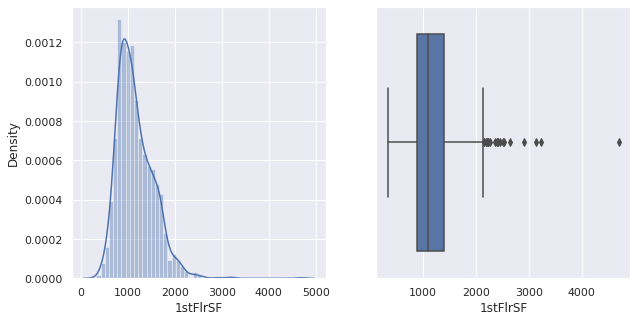

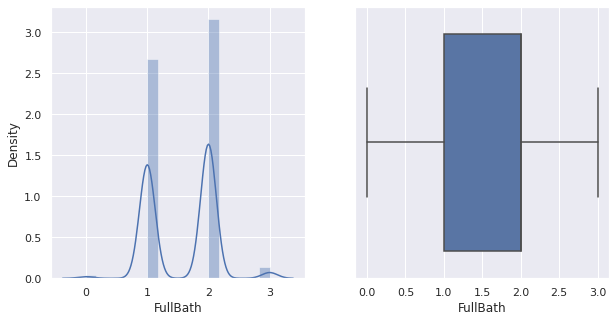

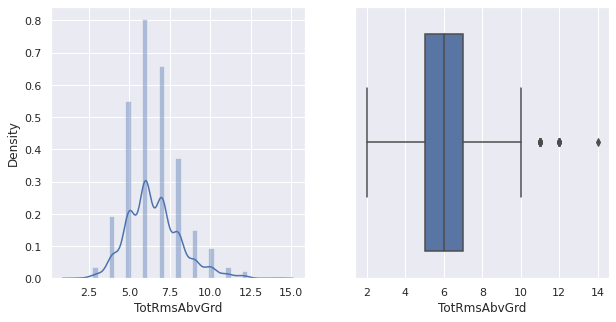

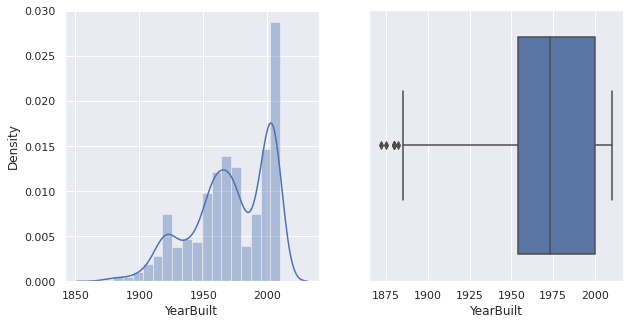

In [66]:
for columna in df_num[columnas]:
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  sns.distplot(df_num[columna], kde=True, ax=axes[0])
  sns.boxplot(df_num[columna], orient='h' ,ax=axes[1]);

<Figure size 432x288 with 0 Axes>

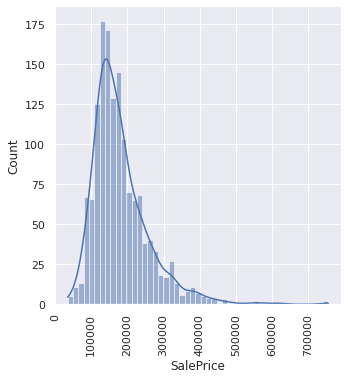

In [67]:
plt.figure()
ax = sns.displot(df_num['SalePrice'], kde=True)
plt.xticks(rotation=90);

In [69]:
df_num['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [70]:
print(f"Skewness: {df_num['SalePrice'].skew()}")
print(f"Kurtosis: {df_num['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


**Hay que recordar que a las regresiones lineales les gusta predecir sobre variables que se comportan de forma normal**

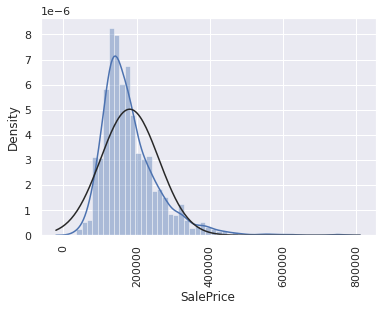

In [71]:
# Para revisar la normalidad de nuestros datos podemos seguir utilizando el 
# plot anterior. 

plt.figure()
ax = sns.distplot(df_num['SalePrice'], fit=norm)
plt.xticks(rotation=90);

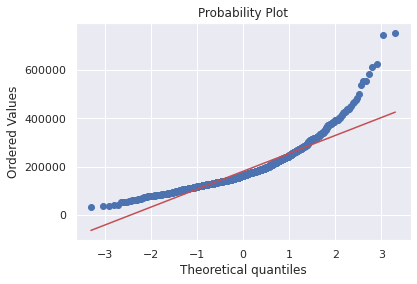

In [72]:
plt.figure()
ax = stats.probplot(df_num['SalePrice'], plot=plt)
plt.show();

In [73]:
# Para normalizar la variable que queremos predecir podemos usar 
# una transformación logarítmica. 

df_num['SalePrice'] = np.log(df_num['SalePrice'])

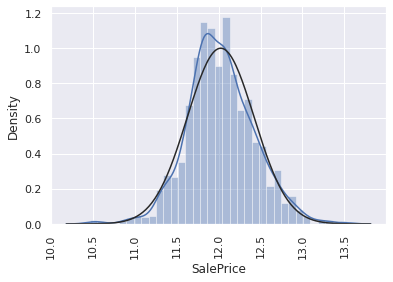

In [74]:
plt.figure()
ax = sns.distplot(df_num['SalePrice'], fit=norm)
plt.xticks(rotation=90);

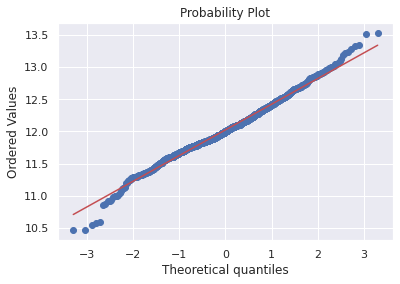

In [75]:
plt.figure()
ax = stats.probplot(df_num['SalePrice'], plot=plt)
plt.show();

Una vez revisada la distribución de nuestras columnas con un mayor valor de correlación. Hay que proceder a revisar las variables categóricas. 

In [76]:
df_categ.head()

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal
2       RL   Pave      IR1  ...          Y       WD        Normal
3       RL   Pave      IR1  ...          Y       WD       Abnorml
4       RL   Pave      IR1  ...          Y       WD        Normal

[5 rows x 27 columns]

In [77]:
df_categ.shape

(1460, 27)

En este caso la cantidad de variables categóricas presentes son bastantes para revisar. En principio la buena práctica sería revisar todas las variables y con conocimiento del tema elegir las que son más relevantes para nuestra predicción. 

Nombre de columna:  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


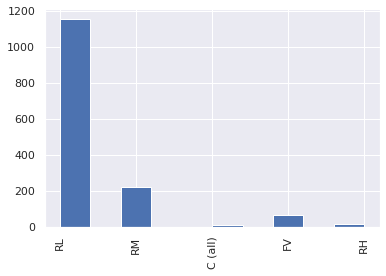

----------------------------------------
Nombre de columna:  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


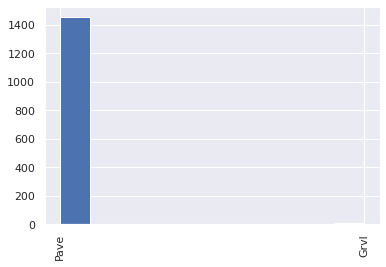

----------------------------------------
Nombre de columna:  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


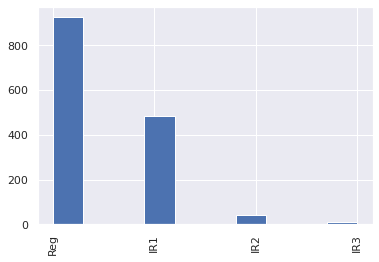

----------------------------------------
Nombre de columna:  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


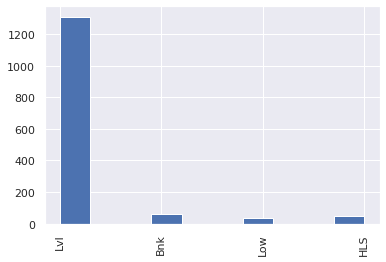

----------------------------------------
Nombre de columna:  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


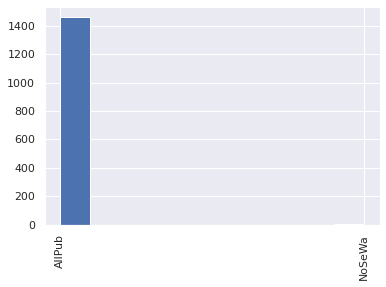

----------------------------------------
Nombre de columna:  LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


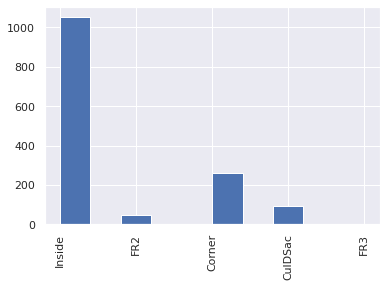

----------------------------------------
Nombre de columna:  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


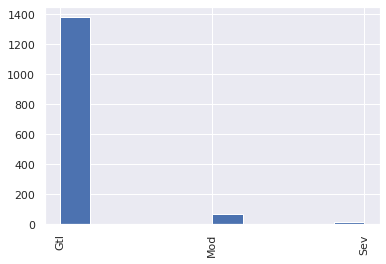

----------------------------------------
Nombre de columna:  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


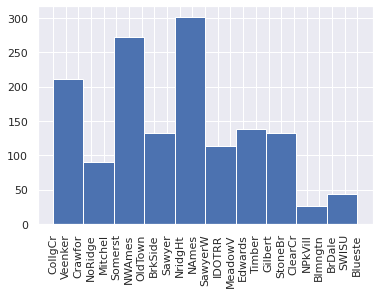

----------------------------------------
Nombre de columna:  Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


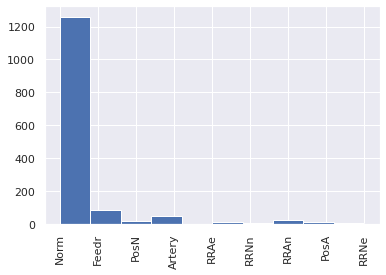

----------------------------------------
Nombre de columna:  Condition2
Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


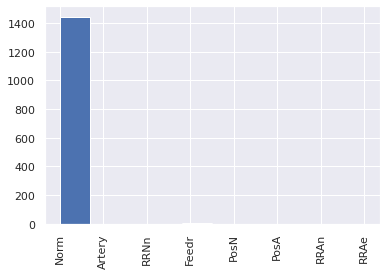

----------------------------------------
Nombre de columna:  BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


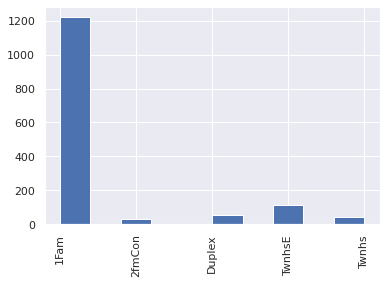

----------------------------------------
Nombre de columna:  HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


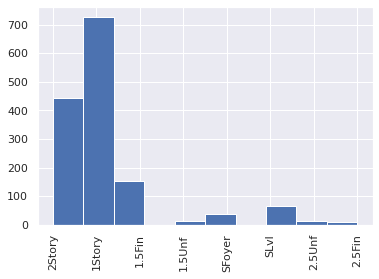

----------------------------------------
Nombre de columna:  RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


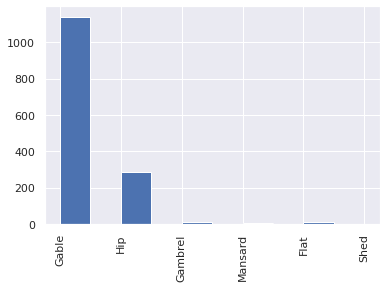

----------------------------------------
Nombre de columna:  RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


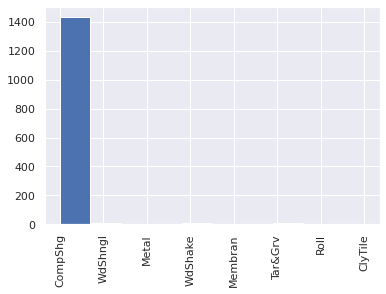

----------------------------------------
Nombre de columna:  Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


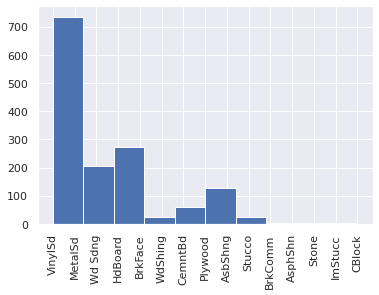

----------------------------------------
Nombre de columna:  Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


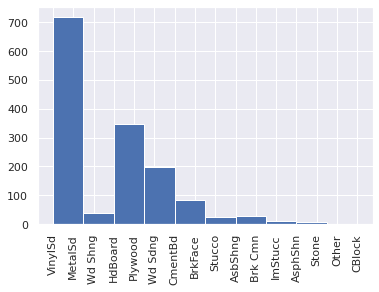

----------------------------------------
Nombre de columna:  ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


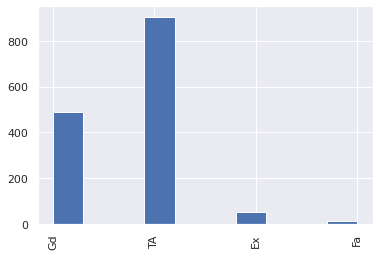

----------------------------------------
Nombre de columna:  ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


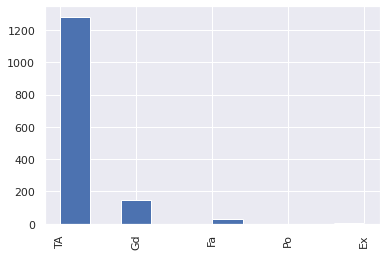

----------------------------------------
Nombre de columna:  Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


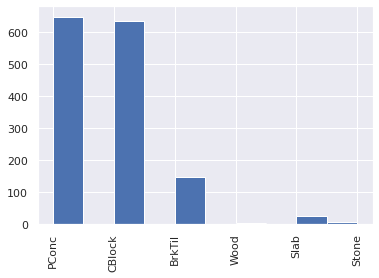

----------------------------------------
Nombre de columna:  Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


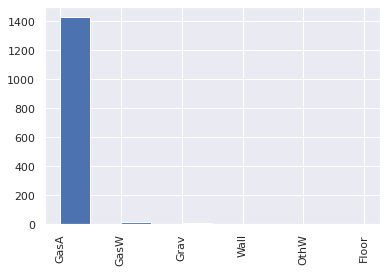

----------------------------------------
Nombre de columna:  HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


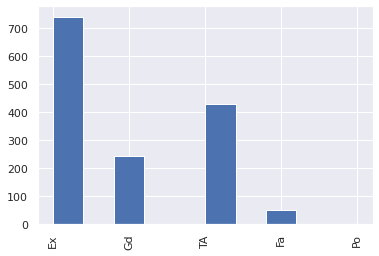

----------------------------------------
Nombre de columna:  CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


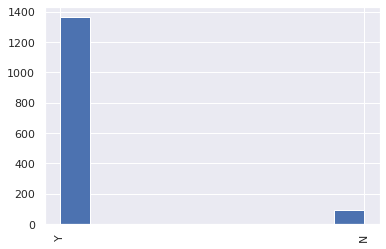

----------------------------------------
Nombre de columna:  KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


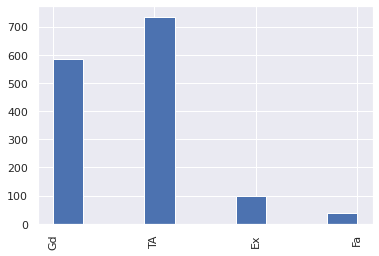

----------------------------------------
Nombre de columna:  Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


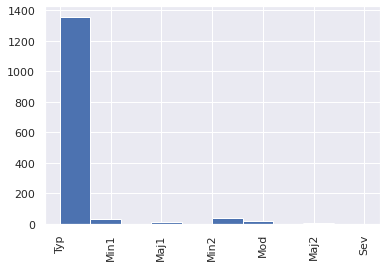

----------------------------------------
Nombre de columna:  PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


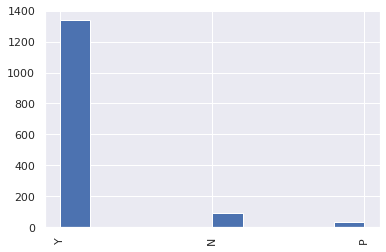

----------------------------------------
Nombre de columna:  SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


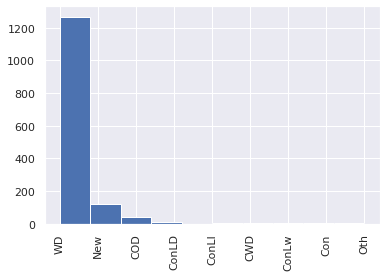

----------------------------------------
Nombre de columna:  SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


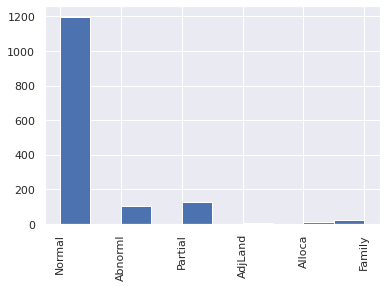

----------------------------------------


In [83]:
for columna in df_categ.columns:
  print(f'Nombre de columna: ', columna)
  print(df_categ[columna].value_counts())
  print(df_categ[columna].hist(xrot=90))
  plt.show()
  print('----' * 10)

En este caso por cuestiones de tiempo mantendremos todas. Ahora para trabajar con ellas es necesario transformarlas, para esto usamos variables dummies. 

In [84]:
df_categ_dummies = pd.get_dummies(df_categ)
df_categ_dummies.head()

MSZoning_C (all)  MSZoning_FV  ...  SaleCondition_Normal  SaleCondition_Partial
0                 0            0  ...                     1                      0
1                 0            0  ...                     1                      0
2                 0            0  ...                     1                      0
3                 0            0  ...                     0                      0
4                 0            0  ...                     1                      0

[5 rows x 182 columns]

In [85]:
data = pd.concat([df_num, df_categ_dummies], axis=1)
data.head()

MSSubClass  LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0          60     8450  ...                     1                      0
1          20     9600  ...                     1                      0
2          60    11250  ...                     1                      0
3          70     9550  ...                     0                      0
4          60    14260  ...                     1                      0

[5 rows x 216 columns]

## Implementando la Regresión Lineal 

En este caso vamos a tomar todas las variables númericas y las variables dummies que generamos anteriormente. 

In [87]:
X = data.drop(columns='SalePrice')
y = data[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Revisamos la forma de nuestros conjuntos de entrenamiento y de prueba. Es necesario que respectivamente las X y la y tengan la misma forma.

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 215)
(292, 215)
(1168, 1)
(292, 1)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

array([5.43802186])

In [ ]:
print(model.coef_)

[[-6.56935855e-04  2.00845520e-06  4.72206143e-02  3.59721634e-02
   2.17781734e-03  9.07647314e-04  6.97771482e-05  1.78804136e-05
  -3.54636802e-06  8.41129080e-05  5.38617171e-05  2.42217271e-05
   1.13968182e-04  1.92051235e-04  3.19864760e-02  5.21177488e-03
   1.68774437e-02  2.80629023e-02  8.57017374e-03 -4.26426762e-02
   3.76350090e-03  2.79533751e-02  1.98162956e-02  1.36838207e-04
   8.96019501e-05  6.87219361e-05  1.01105610e-04  2.23824883e-04
   2.29149205e-04  2.38952174e-05  2.53936182e-06 -1.09171723e-03
  -1.88603531e-03  3.78358258e-01  3.72551940e-01  3.56046107e-01
   3.22963324e-01  7.21289880e-02  3.63027682e-02  2.47675779e-02
   3.78092089e-04  6.31884911e-02  1.06819243e-02  3.80604806e-02
  -2.00096279e-01  2.87416475e-02 -3.62346865e-02 -1.43016934e-01
  -9.68996153e-03  1.46535027e-02 -6.02097813e-02 -1.01841270e-01
  -9.38093660e-02 -2.30114100e-03  4.88401807e-03 -3.48145889e-02
   8.47102141e-02 -8.76670184e-02 -4.41511152e-02 -5.20097134e-02
  -1.92829

In [ ]:
len(model.coef_[0])

188

In [ ]:
betas = model.coef_.flatten()
betas[:10]

array([-6.56935855e-04,  2.00845520e-06,  4.72206143e-02,  3.59721634e-02,
        2.17781734e-03,  9.07647314e-04,  6.97771482e-05,  1.78804136e-05,
       -3.54636802e-06,  8.41129080e-05])

In [ ]:
df_betas = pd.DataFrame(betas, index=data.drop('SalePrice', axis=1).columns,
                        columns=['Betas'])
df_betas.head()

Betas
MSSubClass  -0.000657
LotArea      0.000002
OverallQual  0.047221
OverallCond  0.035972
YearBuilt    0.002178

In [ ]:
# Vamos a hacer la predicción sobre nuestro conjunto de entrenamiento
# y prueba

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9391674009130717, 0.7751333550348735)

''

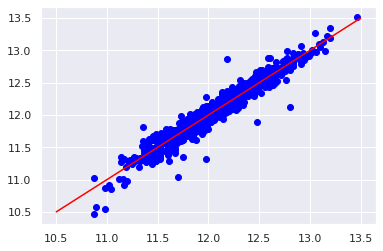

In [ ]:
sns.set()
plt.scatter(y_train_predict, y_train, c='blue', marker='o')
plt.plot([10.5, 13.5], [10.5, 13.5], c="red");

''

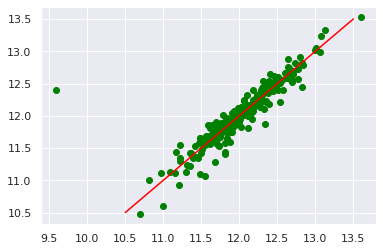

In [ ]:
sns.set()
plt.scatter(y_test_predict, y_test, c='green', marker='o')
plt.plot([10.5, 13.5], [10.5, 13.5], c="red");

### Error medio cuadrado 

In [ ]:
mean_squared_error(y_train, y_train_predict)

0.009273588356673855

In [ ]:
mean_squared_error(y_test, y_test_predict)

0.04196315575354256

### Error para el conjunto de entrenamiento y su predicción 

In [ ]:
y_true_train = y_train.to_numpy().flatten()
y_true_train

array([11.88448902, 12.08953883, 11.35040654, ..., 11.65268741,
       12.15451616, 12.06681058])

In [ ]:
error_train = pd.DataFrame(zip(y_true_train, y_train_predict.flatten()),
                           columns=['y_true', 'y_predict'])
error_train

y_true  y_predict
0     11.884489  11.844083
1     12.089539  12.070104
2     11.350407  11.480363
3     12.072541  11.997375
4     11.751942  11.960682
...         ...        ...
1163  12.080691  12.043384
1164  11.813030  11.839616
1165  11.652687  11.642086
1166  12.154516  12.062551
1167  12.066811  12.197564

[1168 rows x 2 columns]

In [ ]:
error_train['error'] = (error_train['y_true'] - error_train['y_predict'])
error_train

y_true  y_predict     error
0     11.884489  11.844083  0.040406
1     12.089539  12.070104  0.019434
2     11.350407  11.480363 -0.129957
3     12.072541  11.997375  0.075166
4     11.751942  11.960682 -0.208740
...         ...        ...       ...
1163  12.080691  12.043384  0.037307
1164  11.813030  11.839616 -0.026586
1165  11.652687  11.642086  0.010601
1166  12.154516  12.062551  0.091966
1167  12.066811  12.197564 -0.130753

[1168 rows x 3 columns]

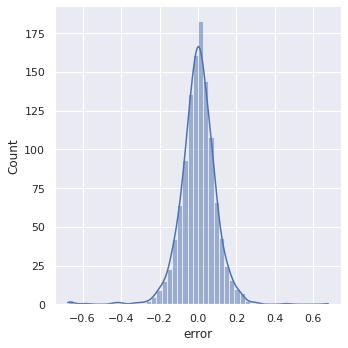

In [ ]:
sns.displot(error_train['error'], kde=True, bins=50, )

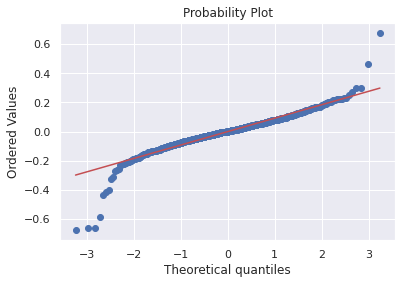

In [ ]:
plt.figure()
ax = stats.probplot(error_train['error'], plot=plt, fit=True, )
plt.show();

### Error para el conjunto de prueba y su predicción

In [ ]:
y_true_test = y_test.to_numpy().flatten()
y_true_test[:10]

array([11.94794938, 12.69158046, 11.65268741, 11.97665948, 12.66191396,
       11.23188794, 12.64915462, 11.8913619 , 11.34450681, 11.81672692])

In [ ]:
error_test = pd.DataFrame(zip(y_true_test, y_test_predict.flatten()),
                           columns=['y_true', 'y_predict'])
error_test

y_true  y_predict
0    11.947949  11.914924
1    12.691580  12.701846
2    11.652687  11.477267
3    11.976659  11.999405
4    12.661914  12.620255
..         ...        ...
287  11.401670  11.809299
288  12.468437  12.466815
289  12.149502  12.119185
290  11.589887  11.575830
291  11.732061  11.689242

[292 rows x 2 columns]

In [ ]:
error_test['error'] = (error_test['y_true'] - error_test['y_predict'])
error_test

y_true  y_predict     error
0    11.947949  11.914924  0.033025
1    12.691580  12.701846 -0.010265
2    11.652687  11.477267  0.175421
3    11.976659  11.999405 -0.022746
4    12.661914  12.620255  0.041659
..         ...        ...       ...
287  11.401670  11.809299 -0.407629
288  12.468437  12.466815  0.001622
289  12.149502  12.119185  0.030317
290  11.589887  11.575830  0.014056
291  11.732061  11.689242  0.042819

[292 rows x 3 columns]

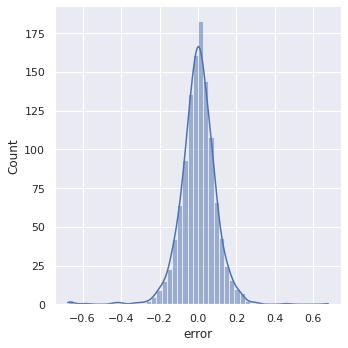

In [ ]:
sns.displot(error_train['error'], kde=True, bins=50)

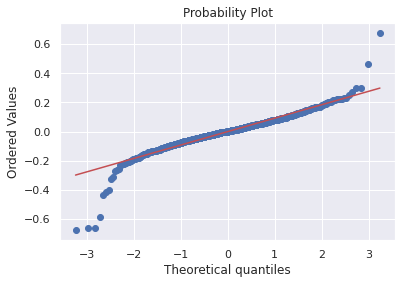

In [ ]:
plt.figure()
ax = stats.probplot(error_train['error'], plot=plt)
plt.show();

### Ahora vamos a revisar la Regresión sólo con el top 10 de columnas númericas 

In [89]:
X = data[columnas_top_10].drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 9)
(292, 9)
(1168,)
(292,)


In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
model.intercept_

5.832732315601955

In [93]:
print(model.coef_)

[ 1.03320942e-01  2.14478831e-04  8.35681478e-02  4.40891697e-05
  6.07007116e-05  6.02684672e-05 -1.46918070e-02  5.99027021e-03
  2.49465804e-03]


In [95]:
len(model.coef_)

9

In [98]:
betas = model.coef_
betas[:10]

array([ 1.03320942e-01,  2.14478831e-04,  8.35681478e-02,  4.40891697e-05,
        6.07007116e-05,  6.02684672e-05, -1.46918070e-02,  5.99027021e-03,
        2.49465804e-03])

In [100]:
df_betas = pd.DataFrame(betas, index=X.columns,
                        columns=['Betas'])
df_betas

Betas
OverallQual   0.103321
GrLivArea     0.000214
GarageCars    0.083568
GarageArea    0.000044
TotalBsmtSF   0.000061
1stFlrSF      0.000060
FullBath     -0.014692
TotRmsAbvGrd  0.005990
YearBuilt     0.002495

In [101]:
# Vamos a hacer la predicción sobre nuestro conjunto de entrenamiento
# y prueba

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [102]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8041201862731517, 0.8382537828173423)

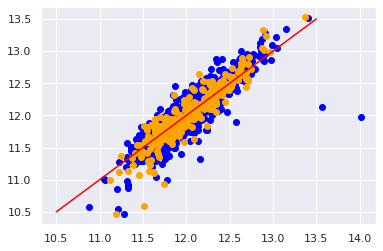

In [105]:
sns.set()
plt.scatter(y_train_predict, y_train, c='blue', marker='o')
plt.scatter(y_test_predict, y_test, c='orange', marker='o')
plt.plot([10.5, 13.5], [10.5, 13.5], c="red");



---



---

